In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from svp import depths
from svp import sound_speed

In [6]:
%timeit
half_pi = np.pi / 2.0

NUM_SAMPLES = 5000
STEP_SIZE = 0.5 # meter
NUMBER_OF_RAYS = 100
points = np.zeros((NUM_SAMPLES, NUMBER_OF_RAYS, 2))

angles = np.linspace(-np.pi/4, np.pi/4, NUMBER_OF_RAYS)

all_angles = np.zeros((NUM_SAMPLES, NUMBER_OF_RAYS))
all_c = np.zeros((NUM_SAMPLES, NUMBER_OF_RAYS))
all_c1 = np.zeros((NUM_SAMPLES, NUMBER_OF_RAYS))
all_c2 = np.zeros((NUM_SAMPLES, NUMBER_OF_RAYS))

# x, y with y being positive down
points[0, :, 1] = 1100.0
points[0, :, 0] = 0.0

for i in range(0, points.shape[0] - 1):
    c1 = np.interp(points[i, :, 1], depths, sound_speed, sound_speed[0], sound_speed[1])
    next_y = points[i, :, 1] + STEP_SIZE * np.sin(angles)
    c2 = np.interp(next_y, depths, sound_speed, sound_speed[0], sound_speed[1])
    
    # surface bounce
    above_ceiling = next_y <= 0
    angles[above_ceiling] *= -1.0 
    
    # bottom bounce
    below_floor = next_y >= 5000
    angles[below_floor] *= -1.0 

    c = c2 / c1
    
    signs = np.sign(angles)
    abs_angles = np.abs(angles)
    
    angles = half_pi - np.arcsin(c * np.sin(half_pi - abs_angles))
    angles *= signs
    # when the angle of incidence is <= 0.000178021183904864 we get nan
    angles = np.nan_to_num(angles)
    points[i + 1, : , 0] = points[i, :, 0] + STEP_SIZE * np.cos(angles)
    points[i + 1, : , 1] = points[i, :, 1] + STEP_SIZE * np.sin(angles)

C:\Users\Maude\AppData\Local\Temp\ipykernel_16392\1810787797.py:38: RuntimeWarning: invalid value encountered in arcsin
  angles = half_pi - np.arcsin(c * np.sin(half_pi - abs_angles))


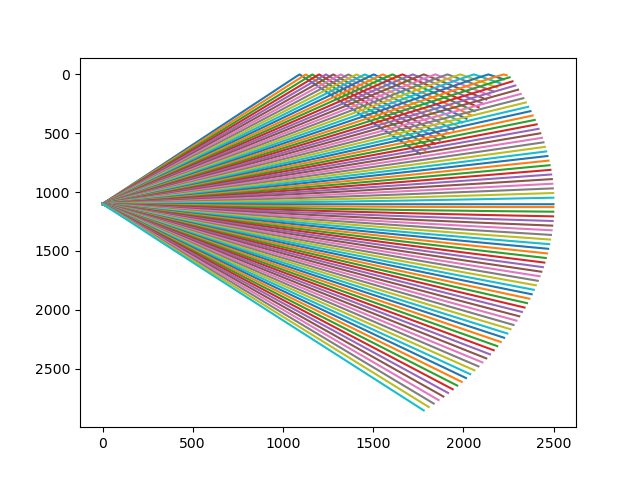

In [7]:
plt.figure()
plt.plot(points[:,:,0], points[:,:,1])
plt.gca().invert_yaxis()